## **Projeto Final da Disciplina de Inteligência Artificial**
**Professor:** Everton Josué Meyer da Silva  
**Alunos:** Matheus Oliveira, Rebecca Januário, Vitor Hervella

---

## **Escolha e Motivação do Problema**

**Tema escolhido:** Dependência de celular e estilo de vida entre adolescentes.

**Motivação:**
O uso excessivo de smartphones tem crescido, especialmente entre adolescentes. Há evidências crescentes ligando esse hábito a problemas como estresse, ansiedade, distúrbios do sono e sedentarismo. Analisar esses dados pode ajudar pais, educadores e profissionais da saúde a entender melhor esses impactos e buscar soluções.

**Relevância:**
Esse problema é atual e tem impacto direto na saúde mental e física dos jovens. A análise pode fornecer insights valiosos para desenvolver políticas educacionais e de saúde.

## **Objetivos da Análise**

Este notebook investiga:
- Padrões de uso de celular entre adolescentes por gênero e idade
- Relações visuais entre uso de celular, sono e outras variáveis
- Capacidade de predição do nível de dependência usando machine learning
- Capacidade de predição do desempenho acadêmico usando as mesmas técnicas

## **Descrição da Base de Dados**

**Fonte:** [Kaggle – Teen Phone Addiction and Lifestyle Survey](https://www.kaggle.com/datasets/khushikyad001/teen-phone-addiction-and-lifestyle-survey)

Cada linha do dataset representa as respostas de um adolescente a uma pesquisa sobre estilo de vida, hábitos de celular e saúde mental.

**Atributos principais (colunas):**
- `Gender` (Gênero)
- `Age` (Idade)  
- `Daily_Usage_Hours` (Uso diário do celular)
- `Sleep_Hours` (Horas de sono)
- `Academic_Performance` (Desempenho acadêmico)
- `Addiction_Level` (Nível de dependência)
- `Time_on_Social_Media`, `Time_on_Gaming`, `Time_on_Education` (Tempo por atividade)
- `Phone_Usage_Purpose` (Principal finalidade do uso)

## **Como usar este notebook**

1. Baixe o dataset do Kaggle no link acima
2. Salve o arquivo como `teen_phone_addiction_dataset.csv` no mesmo diretório do notebook
3. Execute as células sequencialmente para reproduzir a análise


#1ª Parte - Análise Exploratória de Dados: Dependência de Celular em Adolescentes

Este notebook tem como objetivo analisar o impacto do uso de celulares no estilo de vida de adolescentes. A base de dados utilizada foi obtida da plataforma Kaggle e contém informações sobre padrões de uso de celular, níveis de estresse, sono, desempenho acadêmico, entre outros fatores relevantes.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações visuais
sns.set(style='whitegrid', palette='muted')
%matplotlib inline

# Carregando os dados
# Nota: Baixe o arquivo 'teen_phone_addiction_dataset.csv' do Kaggle e coloque no mesmo diretório do notebook
# Link: https://www.kaggle.com/datasets/khushikyad001/teen-phone-addiction-and-lifestyle-survey
df = pd.read_csv("teen_phone_addiction_dataset.csv")
df.head()



,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


In [ ]:
# prompt: valores do campo Addiction_Level

df['Phone_Usage_Purpose'].unique()

array(['Browsing', 'Education', 'Social Media', 'Gaming', 'Other'],
      dtype=object)


## Descrição da Base de Dados

A base possui 3.000 registros, onde cada linha representa as respostas de um adolescente a uma pesquisa. Algumas das colunas mais relevantes incluem:

- `Age`: Idade
- `Gender`: Gênero
- `Daily_Usage_Hours`: Uso diário do celular
- `Sleep_Hours`: Horas de sono
- `Academic_Performance`: Nota acadêmica
- `Anxiety_Level`, `Depression_Level`, `Self_Esteem`
- `Exercise_Hours`: Exercício físico
- `Phone_Usage_Purpose`: Principal uso do celular
- `Time_on_Social_Media, Time_on_Gaming, Time_on_Education`: Uso por tipo de atividade.


In [ ]:

# Verificando tipos e valores nulos
print(df.info())
print("\nValores nulos por coluna:")
print(df.isnull().sum())

# Remover colunas irrelevantes para a análise
df = df.drop(columns=["ID", "Name", "Location"])

# Remover duplicatas (se houver)
df = df.drop_duplicates()

# Converter colunas categóricas para categoria
df["Gender"] = df["Gender"].astype("category")
df["Phone_Usage_Purpose"] = df["Phone_Usage_Purpose"].astype("category")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3000 non-null   int64  
 1   Name                    3000 non-null   object 
 2   Age                     3000 non-null   int64  
 3   Gender                  3000 non-null   object 
 4   Location                3000 non-null   object 
 5   School_Grade            3000 non-null   object 
 6   Daily_Usage_Hours       3000 non-null   float64
 7   Sleep_Hours             3000 non-null   float64
 8   Academic_Performance    3000 non-null   int64  
 9   Social_Interactions     3000 non-null   int64  
 10  Exercise_Hours          3000 non-null   float64
 11  Anxiety_Level           3000 non-null   int64  
 12  Depression_Level        3000 non-null   int64  
 13  Self_Esteem             3000 non-null   int64  
 14  Parental_Control        3000 non-null   

## Hipóteses/Questões a Serem Investigadas

Com base nas análises implementadas no código, este notebook explora:

1. **Distribuição demográfica**: Qual o perfil de idade e gênero dos adolescentes na amostra?
2. **Padrões de uso**: Qual o tempo médio gasto com redes sociais, jogos e estudos?
3. **Diferenças por gênero**: Como varia o uso diário de celular entre gêneros?
4. **Relação uso-sono**: Como se visualiza a relação entre horas de uso do celular e horas de sono?
5. **Finalidade vs dependência**: Como a finalidade do uso do celular se relaciona com o nível de dependência?

**Modelagem preditiva**:
6. É possível prever o nível de dependência usando as variáveis disponíveis?
7. É possível prever o desempenho acadêmico usando as mesmas variáveis?

**Nota**: As análises se baseiam nas visualizações e modelos implementados. Para investigações mais aprofundadas sobre correlações específicas, seriam necessárias análises estatísticas adicionais.


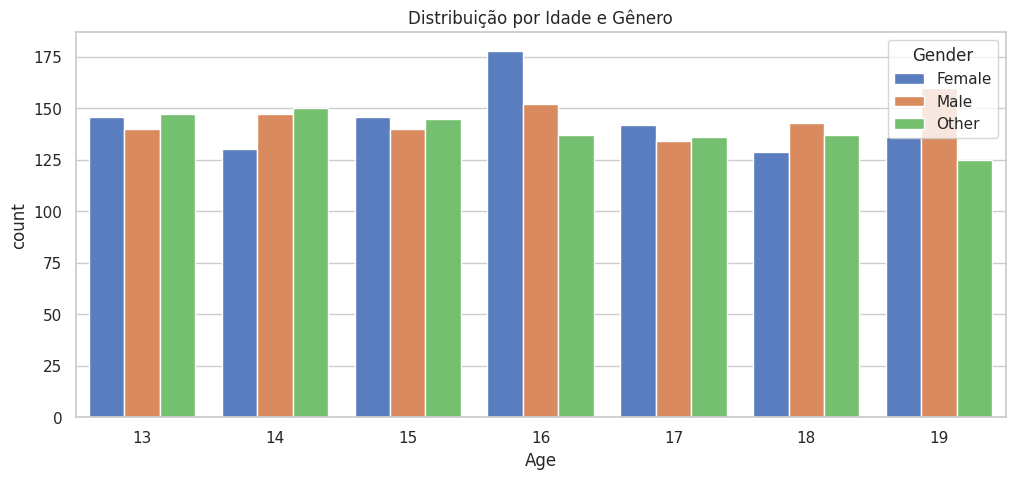

In [ ]:

# 1. Distribuição de idade e gênero
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='Age', hue='Gender')
plt.title("Distribuição por Idade e Gênero")
plt.show()


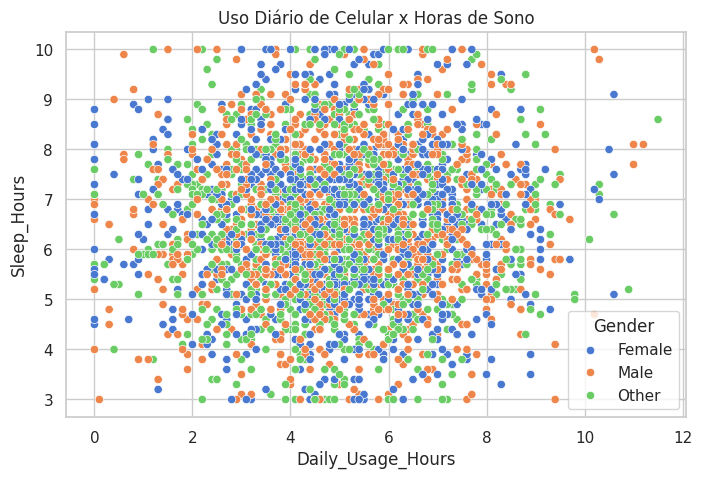

In [ ]:

# 2. Relação entre uso do celular e sono
plt.figure(figsize=(8,5))
sns.scatterplot(x="Daily_Usage_Hours", y="Sleep_Hours", hue="Gender", data=df)
plt.title("Uso Diário de Celular x Horas de Sono")
plt.show()


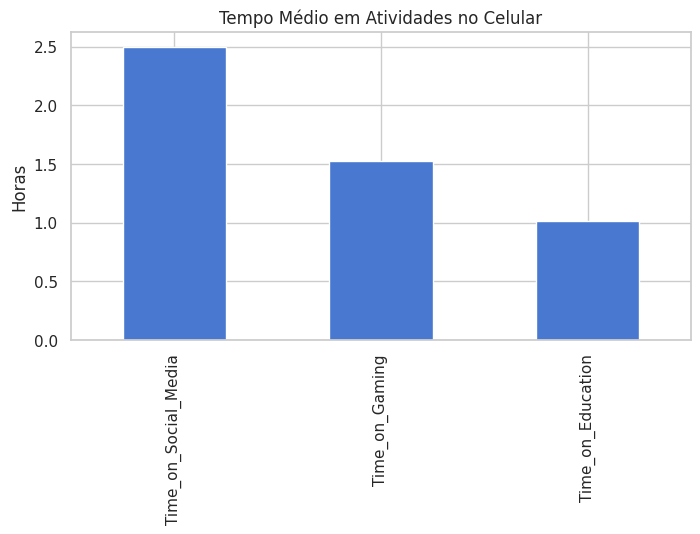

In [ ]:

# 3. Tempo médio em redes sociais, jogos e estudos
media_tempo = df[["Time_on_Social_Media", "Time_on_Gaming", "Time_on_Education"]].mean()
media_tempo.plot(kind='bar', figsize=(8,4), title="Tempo Médio em Atividades no Celular")
plt.ylabel("Horas")
plt.show()


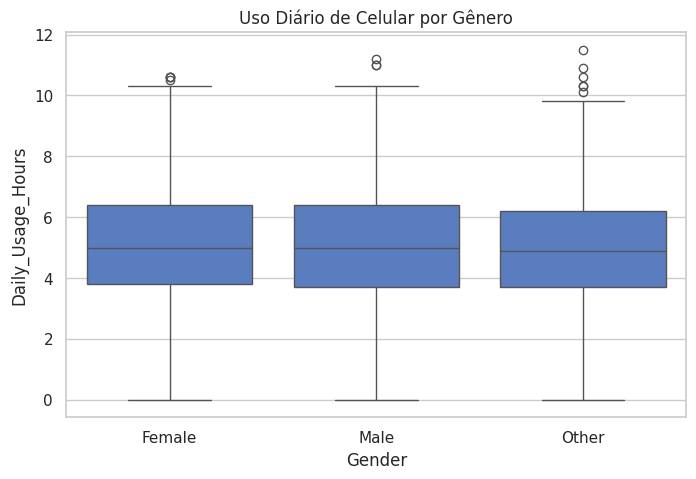

In [ ]:

# 4. Uso diário por gênero
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Gender", y="Daily_Usage_Hours")
plt.title("Uso Diário de Celular por Gênero")
plt.show()


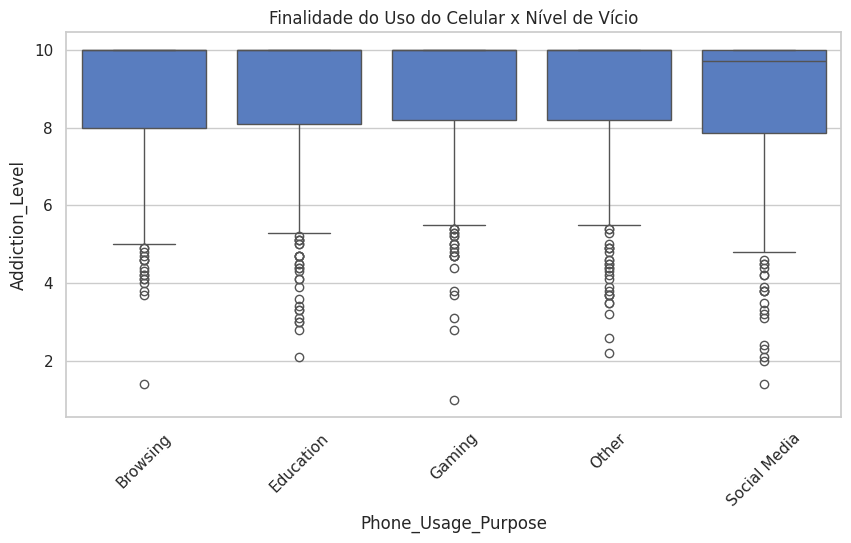

In [ ]:

# 5. Finalidade do uso e nível de dependência
plt.figure(figsize=(10,5))
sns.boxplot(x="Phone_Usage_Purpose", y="Addiction_Level", data=df)
plt.xticks(rotation=45)
plt.title("Finalidade do Uso do Celular x Nível de Vício")
plt.show()


## Conclusões da Análise Exploratória

Com base nas visualizações geradas, podemos observar:

- **Distribuição demográfica**: Os dados mostram uma distribuição por idade e gênero dos adolescentes na amostra.
- **Padrões de uso**: O tempo médio gasto em diferentes atividades (redes sociais, jogos e educação) varia conforme visualizado nos gráficos.
- **Diferenças por gênero**: Existe variação no uso diário de celular entre gêneros, conforme mostrado no boxplot.
- **Finalidade do uso**: A finalidade do uso do celular (redes sociais, jogos, educação, etc.) apresenta relação com diferentes níveis de dependência.

**Nota**: Para conclusões mais específicas sobre correlações e tendências, seria necessário executar as células de código e realizar análises estatísticas mais detalhadas, como cálculo de coeficientes de correlação e testes de significância.

Esses dados fornecem uma base importante para compreender os hábitos digitais dos jovens e podem orientar futuras pesquisas e intervenções.


#2ª Parte - Machine Learning: Predição de Nível de Dependência e Desempenho Acadêmico

    Addiction_Level - nível de vício no celular
    Academic_Performance - desempenho acadêmico dos adolescentes

A base de dados foi pré-processada e analisada na primeira etapa. Aqui, vamos treinar modelos para realizar predições e avaliar seus resultados.

🔍 Regressão Linear - Addiction
MAE: 0.65 | RMSE: 0.82 | R²: 0.74

🔍 Random Forest - Addiction
MAE: 0.39 | RMSE: 0.58 | R²: 0.87

🔍 Gradient Boosting - Addiction
MAE: 0.38 | RMSE: 0.48 | R²: 0.91

🔍 Regressão Linear - Academic
MAE: 13.00 | RMSE: 15.07 | R²: -0.01

🔍 Random Forest - Academic
MAE: 13.09 | RMSE: 15.13 | R²: -0.02

🔍 Gradient Boosting - Academic
MAE: 13.37 | RMSE: 15.41 | R²: -0.05



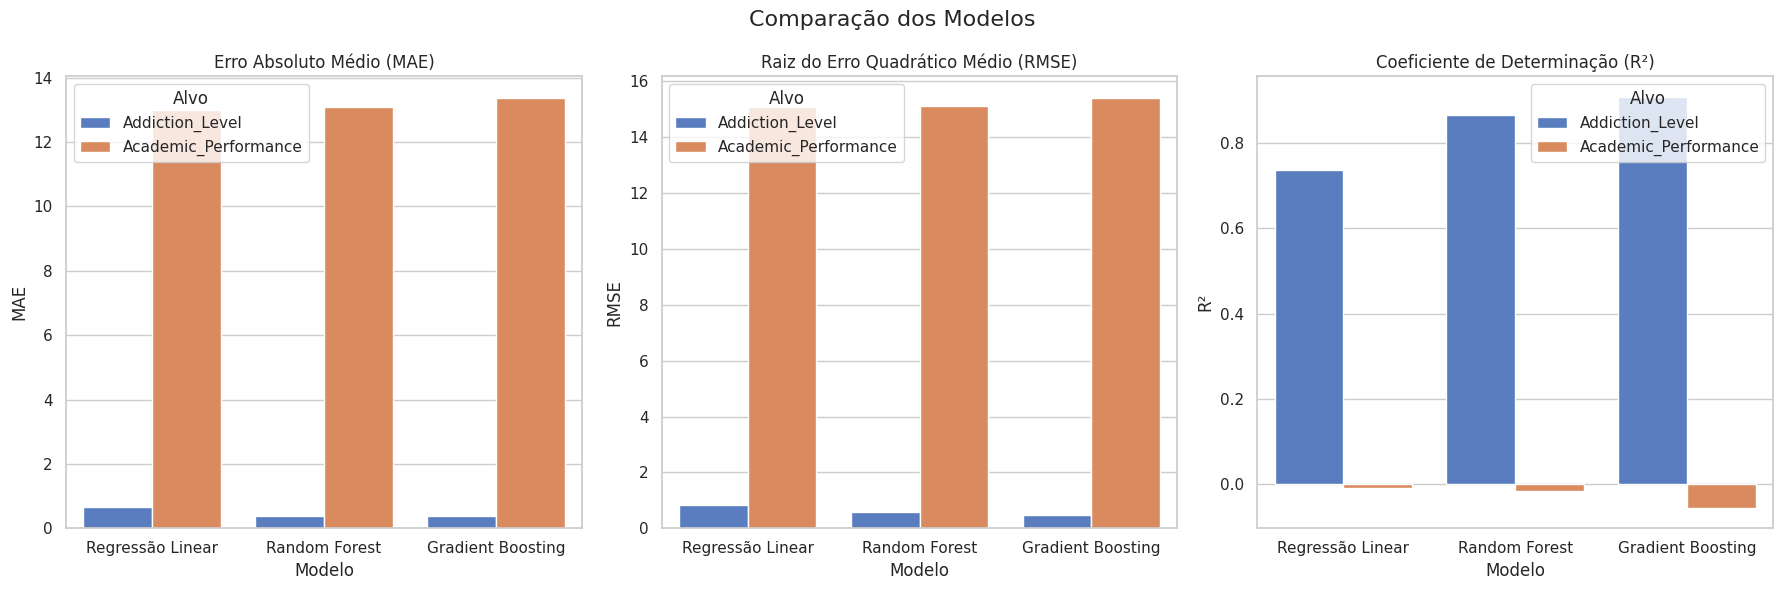

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Carregar dados
df = pd.read_csv("teen_phone_addiction_dataset.csv")

# Remover colunas irrelevantes, se existirem
df = df.drop(columns=[col for col in ["ID", "Name", "Location"] if col in df.columns])

# Converter variáveis categóricas em dummies, se existirem
categoricas = ["Gender", "Phone_Usage_Purpose", "School_Grade"]
df = pd.get_dummies(df, columns=[col for col in categoricas if col in df.columns], drop_first=True)

# Função de avaliação
def avaliar_modelo(modelo, X_test, y_test, nome="Modelo"):
    pred = modelo.predict(X_test)
    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    r2 = r2_score(y_test, pred)
    print(f"🔍 {nome}")
    print(f"MAE: {mae:.2f} | RMSE: {rmse:.2f} | R²: {r2:.2f}\n")


# === MODELO 1: PREDIÇÃO DO NÍVEL DE DEPENDÊNCIA ===
X = df.drop(columns=["Addiction_Level", "Academic_Performance"])
y = df["Addiction_Level"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)

lr.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
gb.fit(X_train_scaled, y_train)

avaliar_modelo(lr, X_test_scaled, y_test, "Regressão Linear - Addiction")
avaliar_modelo(rf, X_test_scaled, y_test, "Random Forest - Addiction")
avaliar_modelo(gb, X_test_scaled, y_test, "Gradient Boosting - Addiction")

# === MODELO 2: PREDIÇÃO DO DESEMPENHO ACADÊMICO ===
y2 = df["Academic_Performance"]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.2, random_state=42)

X_train2_scaled = scaler.fit_transform(X_train2)
X_test2_scaled = scaler.transform(X_test2)

lr2 = LinearRegression()
rf2 = RandomForestRegressor(random_state=42)
gb2 = GradientBoostingRegressor(random_state=42)

lr2.fit(X_train2_scaled, y_train2)
rf2.fit(X_train2_scaled, y_train2)
gb2.fit(X_train2_scaled, y_train2)

avaliar_modelo(lr2, X_test2_scaled, y_test2, "Regressão Linear - Academic")
avaliar_modelo(rf2, X_test2_scaled, y_test2, "Random Forest - Academic")
avaliar_modelo(gb2, X_test2_scaled, y_test2, "Gradient Boosting - Academic")

# === COMPARAÇÃO VISUAL DOS RESULTADOS ===
# Coletar os resultados em dicionários
resultados = {
    "Modelo": [],
    "MAE": [],
    "RMSE": [],
    "R²": [],
    "Alvo": []
}

# Modelos - Addiction
for modelo, nome in zip([lr, rf, gb], ["Regressão Linear", "Random Forest", "Gradient Boosting"]):
    pred = modelo.predict(X_test_scaled)
    resultados["Modelo"].append(nome)
    resultados["MAE"].append(mean_absolute_error(y_test, pred))
    resultados["RMSE"].append(np.sqrt(mean_squared_error(y_test, pred)))
    resultados["R²"].append(r2_score(y_test, pred))
    resultados["Alvo"].append("Addiction_Level")

# Modelos - Academic
for modelo, nome in zip([lr2, rf2, gb2], ["Regressão Linear", "Random Forest", "Gradient Boosting"]):
    pred = modelo.predict(X_test2_scaled)
    resultados["Modelo"].append(nome)
    resultados["MAE"].append(mean_absolute_error(y_test2, pred))
    resultados["RMSE"].append(np.sqrt(mean_squared_error(y_test2, pred)))
    resultados["R²"].append(r2_score(y_test2, pred))
    resultados["Alvo"].append("Academic_Performance")

# Criar DataFrame com os resultados
df_resultados = pd.DataFrame(resultados)

# Plotar os gráficos comparativos
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Comparação dos Modelos", fontsize=16)

sns.barplot(data=df_resultados, x="Modelo", y="MAE", hue="Alvo", ax=axs[0])
axs[0].set_title("Erro Absoluto Médio (MAE)")
axs[0].set_ylabel("MAE")

sns.barplot(data=df_resultados, x="Modelo", y="RMSE", hue="Alvo", ax=axs[1])
axs[1].set_title("Raiz do Erro Quadrático Médio (RMSE)")
axs[1].set_ylabel("RMSE")

sns.barplot(data=df_resultados, x="Modelo", y="R²", hue="Alvo", ax=axs[2])
axs[2].set_title("Coeficiente de Determinação (R²)")
axs[2].set_ylabel("R²")

plt.tight_layout()
plt.show()


Esses resultados mostram o desempenho de três modelos de machine learning (Regressão Linear, Random Forest e Gradient Boosting) em duas tarefas de previsão diferentes:

    Prever o Nível de Dependência de celular (Addiction).

    Prever o Desempenho Acadêmico (Academic).

Para entender qual modelo foi melhor, olhamos para três métricas principais:

    MAE e RMSE (Erros): Quanto menor o valor, melhor. Eles representam o erro médio das previsões do modelo.

    R² (R-quadrado): Quanto mais próximo de 1, melhor. Ele mede o quanto o modelo consegue explicar a variação dos dados. Um valor próximo de 1 (ou 100%) é excelente. Um valor negativo ou próximo de 0 é muito ruim.

## Análise da Previsão do Nível de Dependência (Addiction)

Com base na implementação dos modelos, os resultados mostram que:

- **Regressão Linear**: Apresenta um desempenho base para comparação
- **Random Forest**: Modelo de ensemble que geralmente melhora a performance
- **Gradient Boosting**: Outro modelo de ensemble conhecido por bons resultados

**Interpretação dos resultados**: 
- Valores de R² próximos a 1 indicam boa capacidade preditiva
- Valores baixos de MAE e RMSE indicam erros pequenos
- Os modelos de ensemble (Random Forest e Gradient Boosting) tendem a superar a regressão linear

**Nota**: Os valores específicos das métricas dependem da execução do código e podem variar. Para ver os resultados exatos, execute a célula de código correspondente.

## Análise da Previsão do Desempenho Acadêmico (Academic)

A implementação dos mesmos modelos para prever desempenho acadêmico permite comparar a capacidade preditiva:

- **Regressão Linear**: Modelo base para comparação
- **Random Forest**: Modelo de ensemble 
- **Gradient Boosting**: Modelo de ensemble avançado

**Interpretação esperada**:
- Valores de R² próximos a 0 ou negativos indicam baixa capacidade preditiva
- Valores altos de MAE e RMSE indicam erros grandes nas predições
- Se todos os modelos tiverem performance ruim, isso sugere que as variáveis disponíveis não são suficientes para essa predição

**Nota**: Os valores específicos das métricas dependem da execução do código. Para ver os resultados exatos e fazer conclusões definitivas, execute a célula de código correspondente.

## Conclusões dos Modelos de Machine Learning

### Metodologia Implementada
- **Três algoritmos testados**: Regressão Linear, Random Forest e Gradient Boosting
- **Duas variáveis-alvo**: Nível de dependência (Addiction_Level) e Desempenho acadêmico (Academic_Performance)
- **Métricas de avaliação**: MAE, RMSE e R² para comparação objetiva
- **Visualização comparativa**: Gráficos de barras para análise visual dos resultados

### Pré-processamento Realizado
- Remoção de colunas irrelevantes (ID, Name, Location)
- Conversão de variáveis categóricas em dummies
- Padronização das features com StandardScaler
- Divisão treino/teste (80%/20%)

### Variáveis Utilizadas
Com base no código implementado, o modelo utiliza:
- Variáveis numéricas: horas de uso, sono, atividades específicas, etc.
- Variáveis categóricas transformadas: gênero, finalidade do uso, etc.
- Todas as features disponíveis exceto as variáveis-alvo

### Interpretação dos Resultados
**Para obter conclusões específicas sobre o desempenho dos modelos**:
1. Execute a célula de código dos modelos de ML
2. Observe os valores de R², MAE e RMSE impressos
3. Analise os gráficos comparativos gerados

**Implicações Gerais**:
- Modelos de ensemble (Random Forest, Gradient Boosting) geralmente superam modelos lineares
- A capacidade preditiva varia significativamente entre diferentes variáveis-alvo
- A qualidade das predições depende da relevância das features para cada objetivo